<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana María Aguilera y José Leonardo Aceves

**Fecha:** 14 de octubre del 2021.

**Expediente** : Leo: 712626 y Ana: 720567.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/leonardoaceves/ProyectoSPF_JLACEVES_AMAGUILERA

# Proyecto TEMA-2

## Proyecto Módulo 2- Guía.
> **Integrante 1:** José Leonardo Aceves González

> **Integrante 2:** Ana María Aguilera Gómez

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.

Wine and Spirits Sales in Constellation Brands

### 1.2 Objetivos.
> #### 1.1 Objetivo general:
>  - Generar pronósticos y simulaciones de ventas para aportar esquemas que ayuden a la toma de mejores desiciones.

> #### 1.2 Objetivos específicos:
>  - Encontrar la distribución de probabilidad de los cuatro nodos para obtener su correcta simulación correspondiente.

Nodos:

1. Sold-To Party State (Estado)
2. Order Quantity (Cantidad de cajas de botellas por orden)
3. Brand Name (Marca)
4. Varietal/Blend Description (Tipo de bebida)

### 1.3 Definición del problema.

Ambos miembros del equipo tenemos un empleo que involucra ventas. Ana está en el giro de vinos y licores, mientras que Leonardo en el giro de real state. Creemos que los datos que tienen mayor consistencia y alcance para este proyecto son los de Ana; ella trabaja para Constellation Brands y tiene acceso a los datos de órdenes de compra que generan los puntos de venta de poco más de 26 países. Dicha información se concentra en un documento de Excel, en cuyas columnas se especifican datos como: región, país, unidades, marcas, precios, datos de orden, fechas de envío y demás variables que afectan directa o indirectamente al margen de utilidad de la compañía.

Con los datos obtenidos, se pretende simular el volumen de venta, segmentado para cada uno de los nodos anteriores. Estos nodos se escogieron estratégicamente, ya que representan variables que influyen fuertemente en los tiempos y márgenes de venta.

### 1.4 Nodos y variables que se decidieron simular y porqué

Explicación por nodo:
1. Sold-To Party State

Esta variable representa el estado de destino de las ventas que tienen los productos de Constellation Brands, dentro de Estados Unidos. Esta es una marca ampliamente reconocida a nivel mundial y cuenta con presencia en multiples regiones; sin embargo, para este proyecto se tomarán únicamente las ventas realizadas en EE.UU. Es importante estimar en el futuro cuál de todos estos estados tendrán un aumento en sus tendencias de compra para poder implementar adecuadas estrategias de MKT.  


2. Order Quantity

Esta variable indica la cantidad de cajas que se compran en cada orden de compra, por tipo de producto. Por cada marca existen diferentes tipos de producto con distintos variedades, sabores y formas de empaque. Asimismo, en una misma orden de compra pueden existir más de un producto diferente con cantidades de cajas solicitadas diferentes. Analizar las cantidades que se solicitan por orden y por tipo de producto será determinante para estimar las ventas finales.


3. Brand Name

Como su nombre lo dice, Brand Name representa el nombre comercial de la marca de la bebida distribuida por Constellation Brands. No todas las marcas tienen el mismo impacto y penetración en el mercado, por lo que es importante saber cuáles son las favoritas por los consumidores y así poder tener amplias estimaciones en el futuro consumo de los clientes.

4. Varietal/Blend Description

Varietal/Blend hace referencia a la categoría principal en la cual se coloca cada bebida. Este nodo es de vital importancia para las compañías, ya que ayuda a identificar cuál tipo de producto tendrá mayor impacto y así aplicar estrategias para su comercialización.

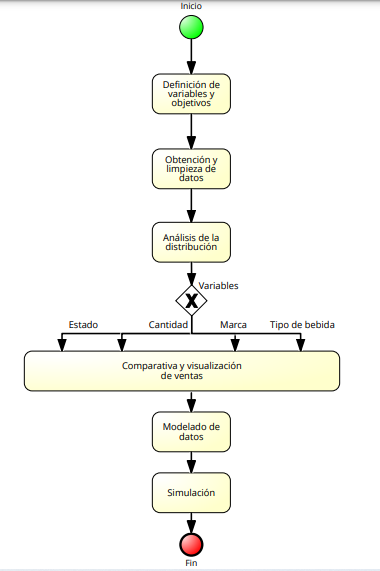

### 1.5 Definición de hipótesis y supuestos.

Supuestos:
- Los datos de las órdenes de compra por producto son independientes, cada cliente solicita sus pedidos de manera separada.
- Como nuestra muestra es muy grande, se tratará de aproximar la distribución de los datos a una distribución normal.

Hipótesis:
- De los tipos de bebida, los wines (vinos) tienen mayor probabilidad de venta que los spirits (otros licores).
- California es el estado con mayor distribución de ventas, por ser el estado más poblado de EE.UU.
- La marca más vendida es Woodbridge by Robert Mondavi porque es la de mayor renombre.

### 1.6 Obtención de bases de datos
> La base de datos la obtuvimos de parte la empresa Constellation Brands Inc, por medio de un archivo de Excel, mismo que se cargará a este cuaderno de Jupyter para su posterior análisis. Se obtuvo este archivo por medio de Ana María, ya que ella actualmente es becaria en Constellation Brands como analista financiero y tiene acceso a dicha información.

### 1.7 Visualización de resultados de simulación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

**Carga de datos**

In [11]:
consbrand = pd.read_excel("Sales report.xlsx")
consbrand.head()

,Sales Order Number,Sold-To Party Name,Sold-To Party State,Sold-To Party Country,Sales Order Creation Date,Customer Service Rep Name,Material Description,Order Quantity,Unit Price,Total Amount,Product Hierarchy Description,Total Liters (L),Varietal/Blend Description,Delivery Date,9LE QTY,Unnamed: 15
0,124887,SGWS - AR (N LITTLE ROCK),AR,US,2021-02-27,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
1,126727,WYOMING LIQ COMMISSION - WY,WY,US,2021-02-28,KRISTIAN SMALDONE,SNCH CHRD NPV 18 750ML/6,1,101.97,101.97,THE SNITCH,4.5,CHARDONNAY,2021-03-11,1,NaN
2,126745,SGWS - AR (N LITTLE ROCK),AR,US,2021-02-28,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
3,126815,UTAH LIQ CONTROL COMMISSION - UT,UT,US,2021-02-28,KRISTIAN SMALDONE,JRG BRUT AMER 750ML/12 SC,1,28.54,28.54,J ROGET,9.0,BRUT,2021-08-04,1,NaN
4,126865,EDER BROS - CT,CT,US,2021-02-28,CHERI MCCAULEY,BMB RSV WHSKE 750ML/6 6,30,219.40,6582.00,BELLE MEADE BOURBON RESERVE,135.0,WHISKY,2021-04-23,15,NaN


In [5]:
dtypes = consbrand.dtypes
dtypes

<ipython-input-5-1dbbcb769585>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  resume = consbrand.describe(exclude=[object])
<ipython-input-5-1dbbcb769585>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  resume = consbrand.describe(exclude=[object])


Sales Order Number                        int64
Sold-To Party Name                       object
Sold-To Party State                      object
Sold-To Party Country                    object
Sales Order Creation Date        datetime64[ns]
Customer Service Rep Name                object
Material Description                     object
Order Quantity                            int64
Unit Price                              float64
Total Amount                            float64
Product Hierarchy Description            object
Total Liters (L)                        float64
Varietal/Blend Description               object
Delivery Date                    datetime64[ns]
9LE QTY                                  object
Unnamed: 15                             float64
dtype: object

Podemos observar en este resumen el tipo de datos con los que contamos. 

- Siete de las variables de nuestra base de datos son texto almacenados como objetos.
- Dos variables son de tipo fecha.
- Cuatro variables son numéricas flotantes.
- Y dos variables son numéricas enteras.


In [10]:
resume1 = consbrand.describe(include=[object]) 
resume1

,Sold-To Party Name,Sold-To Party State,Sold-To Party Country,Customer Service Rep Name,Material Description,Product Hierarchy Description,Varietal/Blend Description,9LE QTY
count,73861,73861,73861,73861,73861,73861,73861,73861
unique,345,49,1,18,625,119,84,924
top,PLCB - PA (HARRISBURG),PA,US,CHRIS MARQUIS,SVED VODKA 1.75LT/6 SC,WOODBRIDGE BY ROBERT MONDAVI,VODKA,1
freq,11550,11584,73861,13705,2274,16367,7139,7166


Se analizan las variables de texto almacenados como objetos:
- Se observa que para todas las variables contamos con 73,861 datos.
- Se observa que contamos con un solo país: EE.UU. y con 49 estados.
- Existen 18 representantes de ventas.
- Existen 84 variedades de vinos / licores.
- Existen 345 clientes y 625 productos diferentes.

In [13]:
resume2 = consbrand.describe(exclude=[object]) 
resume2

<ipython-input-13-ee884d1fa6c7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  resume2 = consbrand.describe(exclude=[object])
<ipython-input-13-ee884d1fa6c7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  resume2 = consbrand.describe(exclude=[object])


,Sales Order Number,Sales Order Creation Date,Order Quantity,Unit Price,Total Amount,Total Liters (L),Delivery Date,Unnamed: 15
count,73861.000000,73861,73861.000000,73861.000000,73861.000000,73861.000000,73861,0.0
unique,NaN,217,NaN,NaN,NaN,NaN,209,NaN
top,NaN,2021-09-13 00:00:00,NaN,NaN,NaN,NaN,2021-08-04 00:00:00,NaN
freq,NaN,2971,NaN,NaN,NaN,NaN,3735,NaN
first,NaN,2021-02-27 00:00:00,NaN,NaN,NaN,NaN,2021-03-04 00:00:00,NaN
last,NaN,2021-10-19 00:00:00,NaN,NaN,NaN,NaN,2021-11-22 00:00:00,NaN
mean,162531.560269,NaN,136.150160,86.797674,10005.301342,1168.550308,NaN,NaN
std,11934.332771,NaN,271.328098,64.719844,23494.404984,2401.764911,NaN,NaN
min,124887.000000,NaN,0.000000,0.034150,2.200000,0.202000,NaN,NaN
25%,153913.000000,NaN,11.000000,48.600000,730.800000,81.000000,NaN,NaN


Se analizan las demás variables:
- Se observa que para todas las variables contamos con 73,861 datos.
- Se observa que no existen valores vacíos.
- Se observan mínimos, máximos, media y desviación estándar.

In [22]:
#FUNCIONES AUTOGENERADAS

#Kernel
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='u')
    return(kde.pdf(x_grid))

#Funcion de generacion de la distribucion discreta.
def distri_dis(p_acum, indices, N):
    #p_acum, es la lista de probabildad acumulada.
    #índices, son los valores reales.
    #N, numero de simulaciones
    U =np.random.rand(N)
    val2id = {i:val_i for i, val_i in enumerate(indices)}
    V = pd.Series([sum([1 for i in p_acum if i < ui]) for ui in U]).map(val2id)
    return(V)


def redu_var(p_acum, indices, U):
    #p_acum, es la lista de probabildad acumulada.
    #índices, son los valores reales.
    #U, cantidad de numeros aleatorias a generar.
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return(y)

def estra_i_espa(B): #igualmente espaciado
    U_estra = (np.random.rand(B) + np.arange(0, B))/B
    return(U_estra)   

## Nodo 1: Estado

Esta es una variable de tipo cualitativa.

Para trabajar con ella, optamos por cambiar el texto de la variable Estado (Sold-To Party State) por números consecutivos de la siguiente forma:

In [16]:
consbrand['Sold-To Party State'].replace(['AR', 'WY', 'UT', 'CT', 'ID', 'GA', 'MT', 'IL', 'CA', 'NY', 'MS',
       'MA', 'FL', 'NJ', 'NC', 'VA', 'HI', 'KS', 'NV', 'TN', 'LA', 'WA',
       'IN', 'ME', 'TX', 'MD', 'AZ', 'RI', 'OH', 'PA', 'SC', 'MN', 'MI',
       'CO', 'NE', 'IA', 'OR', 'NH', 'KY', 'SD', 'MO', 'DE', 'NM', 'AL',
       'VT', 'OK', 'WI', 'ND', 'WV'], np.arange(1,50), inplace=True)
consbrand.head()

,Sales Order Number,Sold-To Party Name,Sold-To Party State,Sold-To Party Country,Sales Order Creation Date,Customer Service Rep Name,Material Description,Order Quantity,Unit Price,Total Amount,Product Hierarchy Description,Total Liters (L),Varietal/Blend Description,Delivery Date,9LE QTY,Unnamed: 15
0,124887,SGWS - AR (N LITTLE ROCK),1,US,2021-02-27,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
1,126727,WYOMING LIQ COMMISSION - WY,2,US,2021-02-28,KRISTIAN SMALDONE,SNCH CHRD NPV 18 750ML/6,1,101.97,101.97,THE SNITCH,4.5,CHARDONNAY,2021-03-11,1,NaN
2,126745,SGWS - AR (N LITTLE ROCK),1,US,2021-02-28,DEANNA GRAUNKE,MEI ROSE MSSB 18 19.5LT/1 KEG,2,181.39,362.78,MEIOMI,39.0,ROSE,2021-04-02,4,NaN
3,126815,UTAH LIQ CONTROL COMMISSION - UT,3,US,2021-02-28,KRISTIAN SMALDONE,JRG BRUT AMER 750ML/12 SC,1,28.54,28.54,J ROGET,9.0,BRUT,2021-08-04,1,NaN
4,126865,EDER BROS - CT,4,US,2021-02-28,CHERI MCCAULEY,BMB RSV WHSKE 750ML/6 6,30,219.40,6582.00,BELLE MEADE BOURBON RESERVE,135.0,WHISKY,2021-04-23,15,NaN


### Método de la transformada inversa

In [17]:
#MÉTODO DE LA TRANFORMADA INVERSA
print('Número de estados: ', consbrand['Sold-To Party State'].nunique())
print(consbrand['Sold-To Party State'].head())
state = consbrand.groupby("Sold-To Party State").count()
state_acum = pd.DataFrame(index = state.index)
freq = state['Sales Order Number'].values

Número de estados:  49
0    1
1    2
2    1
3    3
4    4
Name: Sold-To Party State, dtype: int64


**Histograma de distribución del nodo**

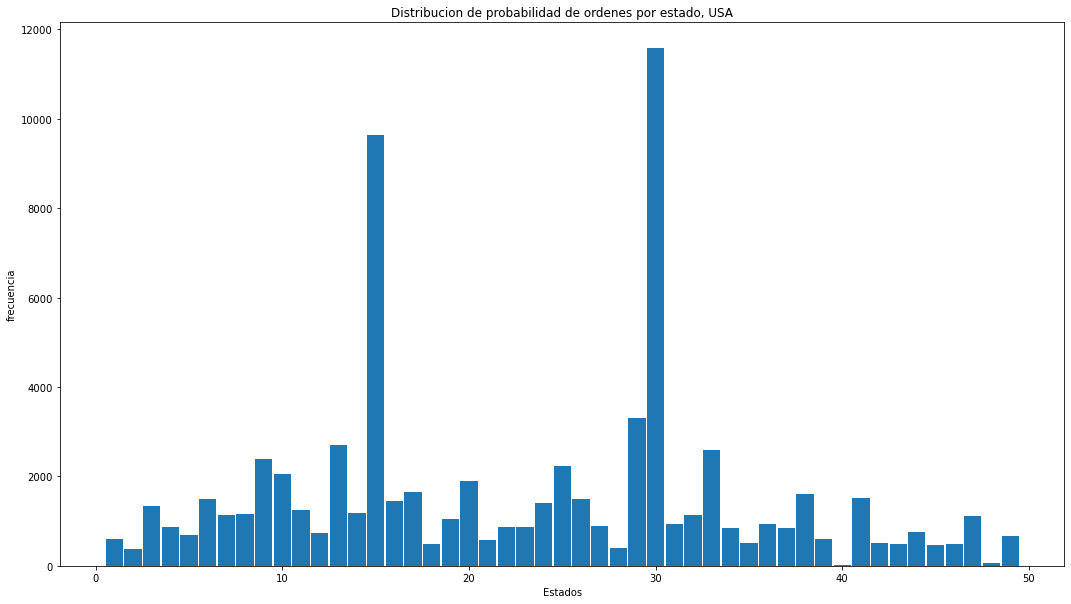

In [19]:
plt.figure(figsize=(18,10))
plt.bar(state.index, freq, width = .92)
plt.title('Distribucion de probabilidad de ordenes por estado, USA')
plt.ylabel('frecuencia')
plt.xlabel('Estados')
plt.show()

Se observa en el histograma cómo están distribuidos los datos por Estado, del 1 al 49.

**Histograma de distribución acumulada**

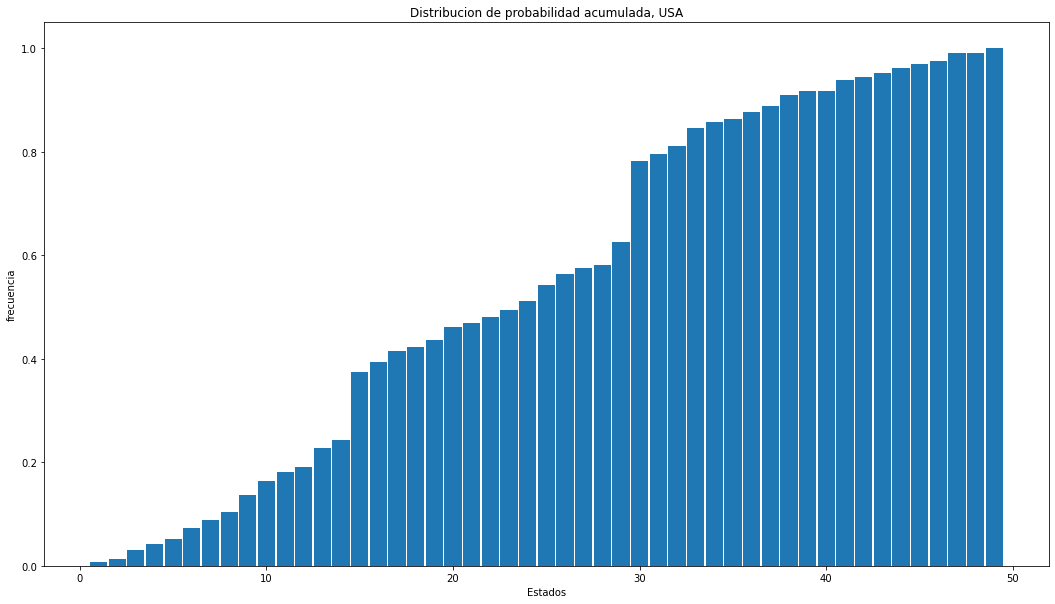

In [20]:
#Cumulative Probability
state_acum['Probability'] = freq/len(consbrand)
state_acum['Cumulative'] = np.cumsum(freq/len(consbrand))
plt.figure(figsize=(18,10))
plt.bar(state.index, state_acum['Cumulative'], width = .92)
plt.title('Distribucion de probabilidad acumulada, USA')
plt.ylabel('frecuencia')
plt.xlabel('Estados')
plt.show()

Se obtuvo la probabilidad de cada estado, así como su probabilidad acumulada y se graficó.

**Generación de una distribución aleatoria**

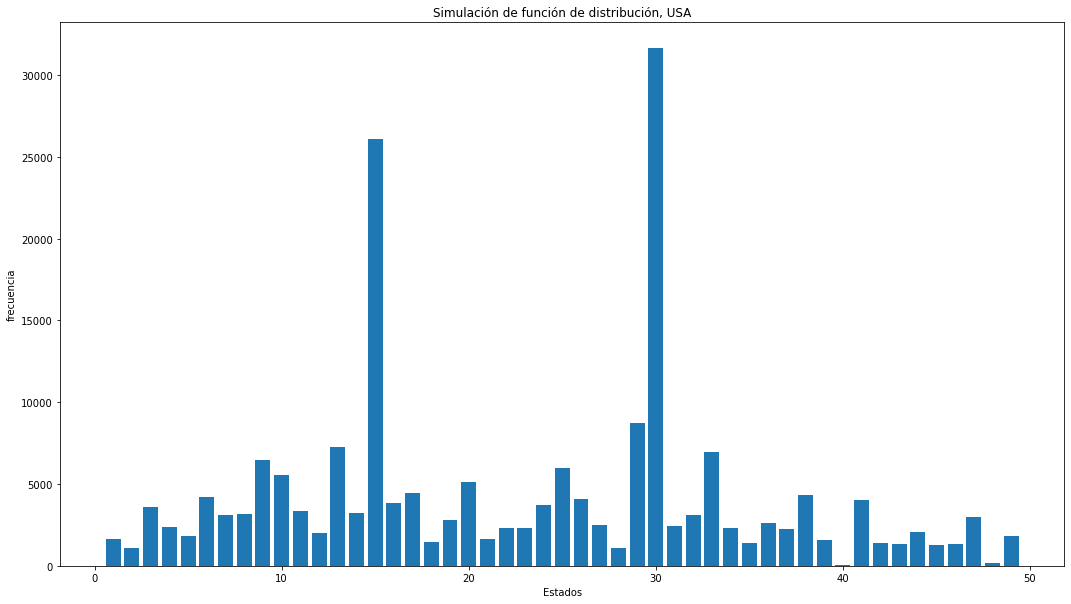

In [24]:
#Generación de distribución aleatoria
distri_diss = distri_dis(state_acum['Cumulative'].values, state.index, 200000) #ES IGUAL A M1
plt.figure(figsize=(18,10))
plt.bar(state.index, distri_diss.value_counts(sort = False))
plt.title('Simulación de función de distribución, USA')
plt.ylabel('frecuencia')
plt.xlabel('Estados')
plt.show()

Con base a nuestros datos, generamos una nueva distribución con variables aleatorias. Se observa en la gráfica la misma.

### Técnica de reducción de varianza

In [26]:
#TÉCNICA DE REDUCCION DE VARIANZA
print("Media distribución discreta: ", 
      round((consbrand['Sold-To Party State']*state_acum['Probability']).sum(),2))

Media distribución discreta:  5.1


**Media por método Montecarlo**

In [27]:
#MEDIA POR METODO MONTECARLO
montecacr = distri_diss.mean()
print('Media Montecarlo crudo', round(montecacr,2))

Media Montecarlo crudo 22.89


**Media por muestreo estratificado 1**

In [28]:
#POR MUESTREO ESTRATIFICADO 1
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(consbrand)*.30/len(consbrand))/.3,
     (len(consbrand)*.30/len(consbrand))/.4 ,
     (len(consbrand)*.30/len(consbrand))/.3] 
m2= list(map(lambda ui,wi: redu_var(state_acum['Cumulative'], 
                                    consbrand['Sold-To Party State'], 
                                    ui)/wi, e, w))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))

Media muestreo estratificado(1): 5.71


**Media por muestreo estratificado 2**

In [29]:
#POR MUESTREO ESTRATIFICADO 2
m3 = redu_var(state_acum['Cumulative'], 
              consbrand['Sold-To Party State'], 
              estra_i_espa(10000))

print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))

Media muestreo estratificado(2):  5.03


**Media por números complementarios**

In [31]:
#POR NÚMEROS COMPLEMENTARIOS
m4 = redu_var(state_acum['Cumulative'], 
              consbrand['Sold-To Party State'],  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))
print('Media números complementarios: ', round(np.mean(m4), 2))

Media números complementarios:  5.02


### Prueba de Bondad y Ajuste

In [32]:
#PRUEBA DE BONDAD Y AJUSTE
#(Datos reales)
print("Media (MonteCarlo): ", round(consbrand['Sold-To Party State'].mean(), 2))
print("Desviacón estandar: ", round(consbrand['Sold-To Party State'].std(), 2))
print("Varianza: ", round(st.sem(consbrand['Sold-To Party State']),2), "vs", 
      round(np.std(consbrand['Sold-To Party State'])/np.sqrt(len(consbrand['Sold-To Party State'])),2))
#Podemos calcular la varianza ya que estas son variables independientes.

Media (MonteCarlo):  22.92
Desviacón estandar:  11.49
Varianza:  0.04 vs 0.04


**Intervalo de confianza**

In [33]:
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(consbrand['Sold-To Party State'].mean(), 
                     consbrand['Sold-To Party State'].std(),
                     100000)
confianza = 0.05

#Intervalo de confianza usando t-student
intervalo1 = st.t.interval(.90, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo2 = st.t.interval(.95, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo3 = st.t.interval(.99, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

Intervalo al 90% de confianza:  (22.88572542588411, 23.005302216729753)
Intervalo al 95% de confianza:  (22.874271351713105, 23.01675629090076)
Intervalo al 99% de confianza:  (22.851884691452085, 23.03914295116178)


**Prueba de Hipótesis Nula**

In [35]:
#HIPÓTESIS NULA
H0 = st.ttest_1samp(X, montecacr)
print('Prueba de hipotesis: ', H0)

#ESTADÍSTICO NORMALIZADO
t = (np.mean(X) - montecacr)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

Prueba de hipotesis:  Ttest_1sampResult(statistic=1.6461185994703655, pvalue=0.0997424863647014)
Estadístico de prueba teórico:  1.64613
Región de rechazo: (t < -0.8352) U (t > 0.8352)


El valor de PValue es un valor mayor al índice de confianza previamente definido, por lo tanto **NO rechazamos** la media calculada en la simulación; sin embargo, el estadístico está **FUERA de la región de aceptación.**

### Kernel Density Estimation (KDE)

In [ ]:
#KERNEL DENSITY ESTIMATION
kernel = kde_statsmodels_m(consbrand['Sold-To Party State'], state.index, bandwidth=0.2)
plt.bar(state.index ,state_acum['Probability'])
plt.plot(state.index, kernel)
plt.show()

### Trama Q-Q

## Nodo 2: Cantidad del pedido

(Cantidad de cajas de botellas por producto)

Esta variable es de tipo entero; por lo tanto, se trata de una variable de tipo **cuantitativa discreta.**

### Método de la Transformada inversa

In [36]:
botellas = consbrand.groupby("Order Quantity").count()

#METODO DE LA TRANFORMADA INVERSA
print(consbrand['Order Quantity'].head())
botellas_acum = pd.DataFrame(index = botellas.index)
freqb = botellas['Sales Order Number'].values

0     2
1     1
2     2
3     1
4    30
Name: Order Quantity, dtype: int64


**Histograma de distribución del nodo**

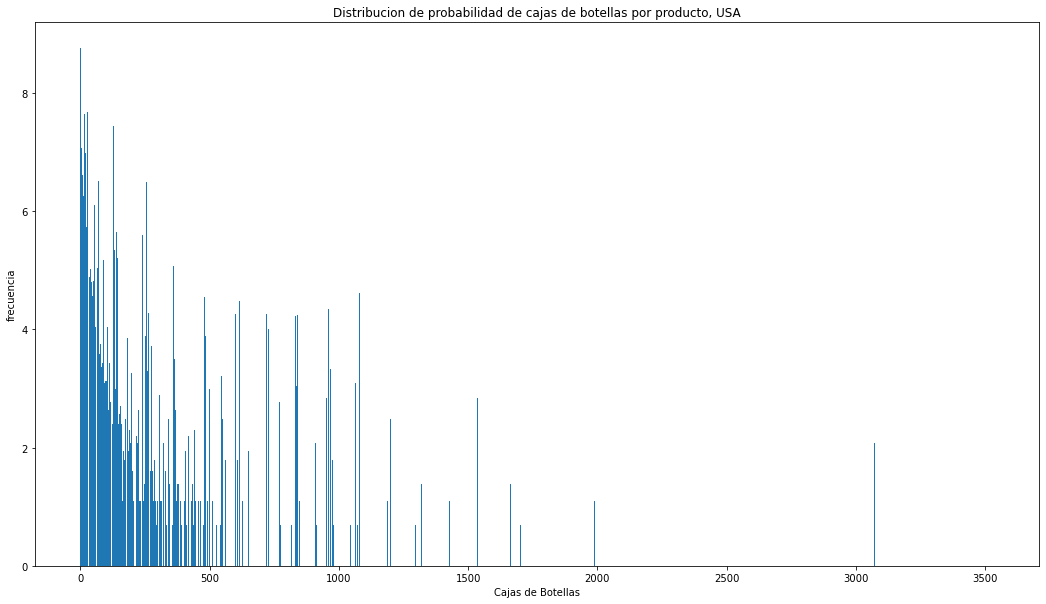

In [39]:
plt.figure(figsize=(18,10))
plt.bar(botellas.index, np.log(freqb), width = .92)
plt.title('Distribucion de probabilidad de cajas de botellas por producto, USA')
plt.ylabel('frecuencia')
plt.xlabel('Cajas de Botellas')
plt.show()

En esta gráfica se puede observar cómo están distribuidas las cajas de botellas que se piden por orden de compra por producto.

**Histograma de distribución acumulado**

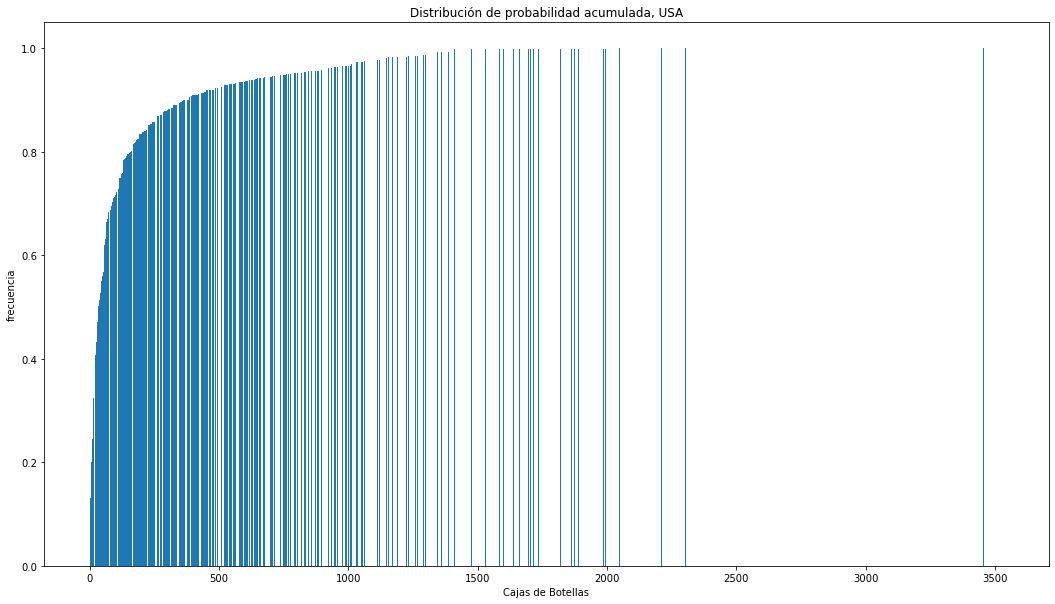

In [41]:
botellas_acum['Probability'] = freqb/len(consbrand)
botellas_acum['Cumulative'] = np.cumsum(freqb/len(consbrand))
#Cumulative
plt.figure(figsize=(18,10))
plt.bar(botellas.index, botellas_acum['Cumulative'], width = .92)
plt.title('Distribución de probabilidad acumulada, USA')
plt.ylabel('frecuencia')
plt.xlabel('Cajas de Botellas')
plt.show()

En este histograma se puede observar la distribución de probabilidad acumulada, una vez que la calculamos.

**Generación de una distribución aleatoria**

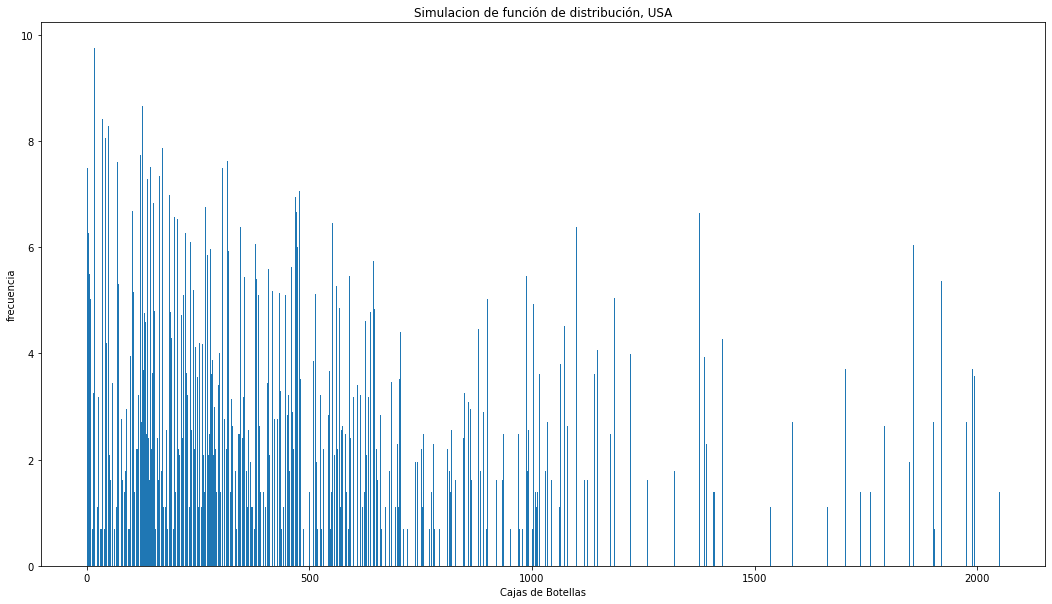

In [42]:
distri_dissb = distri_dis(botellas_acum['Cumulative'].values, botellas.index, 200000) #ES IGUAL A M1
plt.figure(figsize=(18,10))
plt.bar(botellas.index[0:len(distri_dissb.value_counts(sort = False))], np.log(distri_dissb.value_counts(sort = False)))
plt.title('Simulacion de función de distribución, USA')
plt.ylabel('frecuencia')
plt.xlabel('Cajas de Botellas')
plt.show()

A partir de nuestra distribución de los datos real, generamos una nueva distribución con variables aleatorias, como se observa en el histograma.

### Técnica de Reducción de Varianza

In [43]:
#TÉCNICA DE REDUCCIÓN DE VARIANZA
print("Media distribución discreta: ", 
      round((consbrand['Order Quantity']*botellas_acum['Probability']).sum(),2))

Media distribución discreta:  91.69


**Media por Montecarlo**

In [44]:
#MEDIA POR MÉTODO MONTECARLO
montecacrb = distri_dissb.mean()
print('Media Montecarlo crudo', round(montecacrb,2))

Media Montecarlo crudo 136.47


**Media por muestreo estratificado 1**

In [45]:
#MUESTREO ESTRATIFICADO
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(consbrand)*.30/len(consbrand))/.3,
     (len(consbrand)*.30/len(consbrand))/.4 ,
     (len(consbrand)*.30/len(consbrand))/.3] 
m2= list(map(lambda ui,wi: redu_var(botellas_acum['Cumulative'], 
                                    consbrand['Order Quantity'], 
                                    ui)/wi, e, w))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))

Media muestreo estratificado(1): 122.74


**Media por muestreo estratificado 2**

In [46]:
m3 = redu_var(botellas_acum['Cumulative'], 
              consbrand['Order Quantity'], 
              estra_i_espa(10000))

print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))

Media muestreo estratificado(2):  93.45


**Media por números complementarios**

In [49]:
#NÚMEROS COMPLEMENTARIOS
m4 = redu_var(botellas_acum['Cumulative'], 
              consbrand['Order Quantity'],  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))
print('Media números complementarios: ', round(np.mean(m4), 2))

Media números complementarios:  93.47


### Prueba de Bondad y Ajuste

In [50]:
#PRUEBA DE BONDAD Y AJUSTE
#(Datos reales)
print("Media (MonteCarlo): ", round(consbrand['Order Quantity'].mean(), 2))
print("Desviación estandar: ", round(consbrand['Order Quantity'].std(), 2))
print("Varianza: ", round(st.sem(consbrand['Order Quantity']),6), "vs", 
      round(np.std(consbrand['Order Quantity'])/np.sqrt(len(consbrand['Order Quantity'])),6))
#Podemos calcular la varianza ya que estas son variables independientes.

Media (MonteCarlo):  136.15
Desviación estandar:  271.33
Varianza:  0.99836 vs 0.998353


**Intervalo de confianza**

In [51]:
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(consbrand['Order Quantity'].mean(), 
                     consbrand['Order Quantity'].std(),
                     100000)
confianza = 0.05

#Intervalo de confianza usando t-student
intervalo1 = st.t.interval(.90, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo2 = st.t.interval(.95, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo3 = st.t.interval(.99, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

Intervalo al 90% de confianza:  (135.30266664014968, 138.12677631489564)
Intervalo al 95% de confianza:  (135.03214958200792, 138.3972933730374)
Intervalo al 99% de confianza:  (134.50343173148454, 138.92601122356078)


**Prueba de Hipótesis Nula**

In [53]:
#HIPÓTESIS NULA
H0 = st.ttest_1samp(X, montecacrb)
print('Prueba de hipótesis: ', H0)

#ESTADÍSTICO NORMALIZADO
t = (np.mean(X) - montecacrb)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

Prueba de hipótesis:  Ttest_1sampResult(statistic=0.28494787672428457, pvalue=0.7756846655043622)
Estadístico de prueba teórico:  0.28495
Región de rechazo: (t < -0.8352) U (t > 0.8352)


La prueba nos arroja un PValue de 0.7757; como el valor es grande, **NO RECHAZO.**

Además, el estadístico obtenido de 0.285 se encuentra **dentro de la región de aceptación.**

### Kernel Density Estimation (KDE)

### Tramas Q-Q

.

## Nodo 3:

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo